In [54]:
import os
import os.path

os.chdir(os.path.expanduser(os.path.join('~', 'p', 'smqtk', 'docker')))
!echo current directory: $(pwd)
!echo
image_directory = os.path.join('leedsbutterfly', 'images')
!echo {image_directory}
!echo
!ls {image_directory} 2> /dev/null | head | sed -re 's/^/    /g'

current directory: /Users/opadron/p/smqtk/docker

leedsbutterfly/images

    001_0001.jpg
    001_0002.jpg
    001_0003.jpg
    001_0004.jpg
    001_0005.jpg
    001_0006.jpg
    001_0007.jpg
    001_0008.jpg
    001_0009.jpg
    001_0010.jpg


In [55]:
!export IMAGE_DIR='{image_directory}'
!docker-compose up -d

Creating network "docker_default" with the default driver
Creating smqtk-postgres ... 
Creating smqtk-postgres
Creating docker_smqtk_1 ... mdone
Creating docker_smqtk_1
Creating docker_wrapper_1 ... one
Creating docker_wrapper_1
 docker_wrapper_1 ... done

In [56]:
from time import sleep
import requests
from sys import stdout

num_attempts = 10
poll_interval = 30.0
connection_successful = False
for attempt in range(num_attempts):
    stdout.write('connection attempt {}/{}: '.format(attempt + 1, num_attempts))
    stdout.flush()
    req = requests.get('http://localhost:12345/count')
    if req.status_code == 503: # downstream service is still preprocessing images
        print('busy')
        sleep(poll_interval)
    else:
        print('connected!')
        connection_successful = True
        break
        
print()
if connection_successful:
    print(req.json())
else:
    print((
        'Connection failed after {} attempt{}.  '
        'Check to make sure that all docker services '
        'are running properly'
    ).format(num_attempts, '' if num_attempts == 1 else 's'))

connection attempt 1/10: busy
connection attempt 2/10: busy
connection attempt 3/10: busy
connection attempt 4/10: busy
connection attempt 5/10: busy
connection attempt 6/10: busy
connection attempt 7/10: busy
connection attempt 8/10: busy
connection attempt 9/10: connected!

{'count': 832}


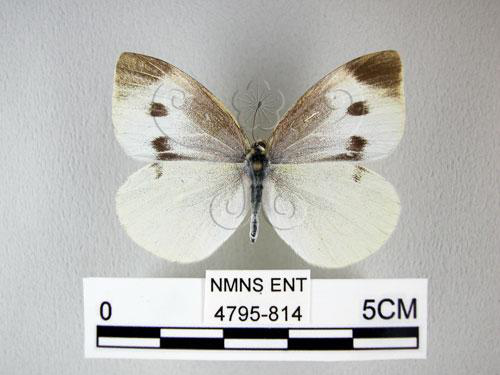

In [57]:
query_url = 'http://localhost:12345/image/b9de1f8af1093ecc1f49da847d3f1ce686f70c99'
req = requests.get(query_url)

from PIL import Image
from io import BytesIO
I = Image.open(BytesIO(req.content))
I

In [58]:
req = requests.get('http://localhost:12345/nn/' + query_url)
result = req.json()

from pprint import pprint as pp
pp(result)

{'distances': [0.0,
               6601.052439538724,
               6862.838580329643,
               7205.433966443346,
               7350.444773747946,
               7402.682456576444,
               7466.616535220502,
               7579.987936042794,
               7640.53208917858,
               7738.77514418004],
 'message': 'descriptor computed',
 'neighbors': ['b9de1f8af1093ecc1f49da847d3f1ce686f70c99',
               '21f52613795eadcfceb87b5c3f2d70c096ef5858',
               '33b3c452ea53ced59c29a935d3c548d638021055',
               '2f4b14bf0efa57c74c9f0554272321bcc99a9416',
               '6fa3247bb4d29117fd9b919293b31f17c0ee6f97',
               '8aac399598f6b5f9ad633ba2b5bba9afeffd7e17',
               '75847b5c0ea915fc75ad3367981a5f2c6ae83ea6',
               '4e2cb67fe6fb8cb53328f7431e1ce63846ae4c37',
               'e66909f3d5a957892ab8e5a3ca01f2fa8fc53378',
               'da40cc564b6bdeebecd834e1f9f3592a94642b13'],
 'reference_uri': 'http://wrapper:12345/image/b9d

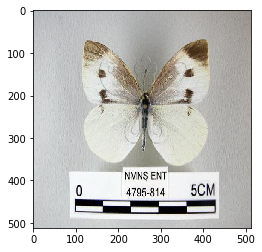

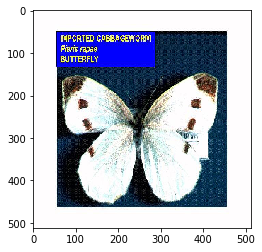

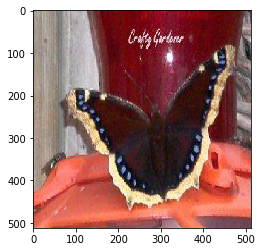

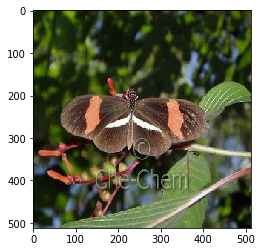

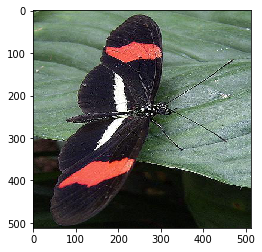

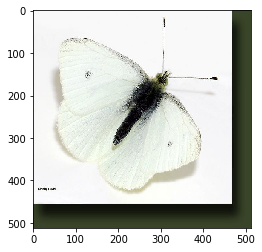

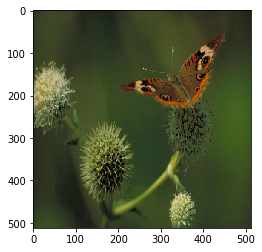

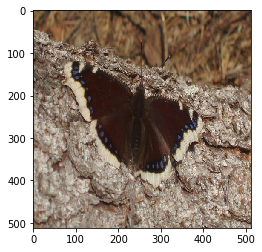

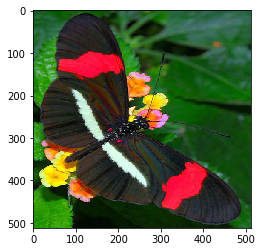

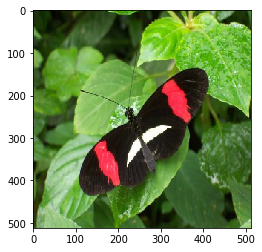

In [59]:
import numpy as np
from matplotlib import pyplot
from matplotlib.pyplot import imshow

figs = []

for index, neighbor in enumerate(result['neighbors']):
    req = requests.get('http://localhost:12345/image/' + neighbor)
    I = Image.open(BytesIO(req.content))
    fig = pyplot.figure()
    fig.gca().imshow(np.asarray(I.resize((512, 512))))
    figs.append(fig)
    
pyplot.show(figs)
for fig in figs:
    fig.clear()
del figs
    

In [60]:
!docker-compose down

Stopping docker_wrapper_1 ... 
Stopping docker_smqtk_1 ... 
Stopping smqtk-postgres ... 
Removing docker_wrapper_1 ... one0m
Removing docker_smqtk_1 ... 
Removing smqtk-postgres ... 
Removing network docker_defaultdone
